In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import GPy
from GPyOpt.methods import BayesianOptimization

sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

def minutes_to_hours_minutes(minutes):
    hours = minutes // 60
    minutes = minutes % 60
    return f'{int(hours):02d}:{int(minutes):02d}'

def time_plot_hours(df):
    df['Time_minutes'] = df['Time'].apply(lambda x: time_to_minutes(x))
    
    initial_time = df['Time_minutes'][0]
    df['MinutesFromStart'] = df['Time_minutes'] - initial_time
    
    # Adjust for the passage of days
    day_minutes = 1440  # 24 hours * 60 minutes
    for i in range(1, len(df)):
        if df.loc[i, 'MinutesFromStart'] < df.loc[i - 1, 'MinutesFromStart']:
            df.loc[i:, 'MinutesFromStart'] += day_minutes
    
    df['Hours_from_start'] = df['MinutesFromStart'].apply(lambda x: minutes_to_hours_minutes(x))
   
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Hours_from_start'], df['Amount'], marker='o')
    plt.xlabel('Time (hours:minutes from start)')
    plt.ylabel('Amount (ml)')
    plt.title('Amount vs Time (Hours from Start)')
    
    return df



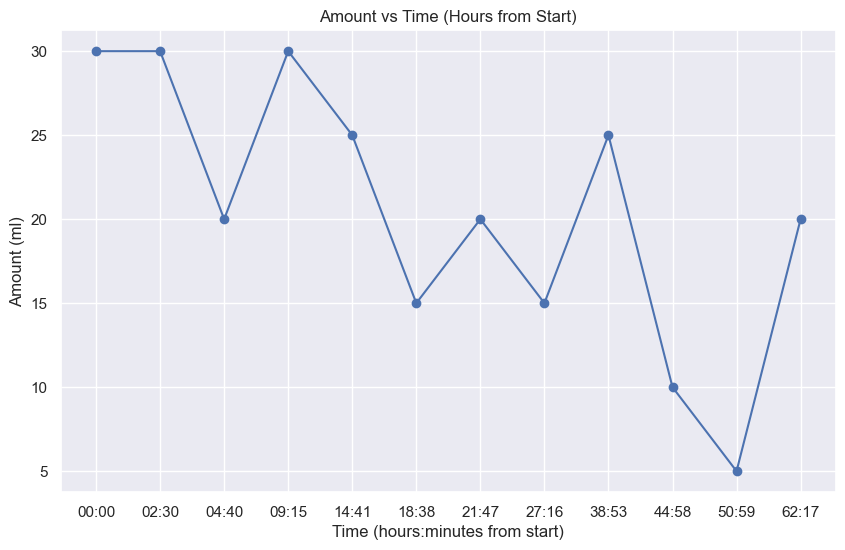

In [3]:
df = pd.DataFrame({
    'Time': ['16:48', '19:18', '21:28', '2:03', '7:29', '11:26', '14:35',
             '20:04', '7:41', '13:46', '19:47', '7:05'],
    'Amount': [30, 30, 20, 30, 25, 15, 20, 15, 25, 10, 5, 20]
})
processed_df = time_plot_hours(df)


In [4]:
processed_df

,Time,Amount,Time_minutes,MinutesFromStart,Hours_from_start
0,16:48,30,1008,0,00:00
1,19:18,30,1158,150,02:30
2,21:28,20,1288,280,04:40
3,2:03,30,123,555,09:15
4,7:29,25,449,881,14:41
5,11:26,15,686,1118,18:38
6,14:35,20,875,1307,21:47
7,20:04,15,1204,1636,27:16
8,7:41,25,461,2333,38:53
9,13:46,10,826,2698,44:58
